### Wisdom Osborn Abuyah
### 10990181
### Biomedical Engineering
### Project 1


In [176]:
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

#from scipy.stats import ttest_1sam
import numpy as np
from sklearn.linear_model import LinearRegression

In [177]:

df = pd.read_csv('data.csv')
df





,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,NaN,0.65,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


### Getting some knowledge on the various parameters within the data

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1600 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1600 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1598 non-null   float64
 6   free sulfur dioxide   1600 non-null   float64
 7   total sulfur dioxide  1600 non-null   float64
 8   density               1600 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


### frow the info data , there are some missing  data values that must be fixed 

In [179]:
df.tail()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0
1600,1601,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6.0


In [180]:
df.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1600.000000,1601.000000,1600.000000,1601.000000,1598.000000,1600.000000,1600.000000,1600.000000,1600.000000,1601.000000,1601.000000,1600.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.740039,0.178981,0.194745,1.409138,0.047076,10.458487,32.977723,0.001887,0.154338,0.169471,1.065495,0.807368
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.250000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [181]:
df.shape

(1601, 13)

In [182]:
w=df.duplicated()
w


0       False
1       False
2       False
3       False
4       False
        ...  
1596    False
1597    False
1598    False
1599    False
1600    False
Length: 1601, dtype: bool

#### To find out whether the data set has Null values or not

In [183]:
df.isnull().any()

ID                      False
fixed acidity            True
volatile acidity        False
citric acid              True
residual sugar          False
chlorides                True
free sulfur dioxide      True
total sulfur dioxide     True
density                  True
pH                       True
sulphates               False
alcohol                 False
quality                  True
dtype: bool

In [184]:
#sns.histplot(w)

### To remove duplicated data

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1600 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1600 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1598 non-null   float64
 6   free sulfur dioxide   1600 non-null   float64
 7   total sulfur dioxide  1600 non-null   float64
 8   density               1600 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1600 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


### From  the above information , some of the columns have missing  values and hence must be filled
### To fix the dataset first we must use either the mean , mode or median to  fill in the empty slot with the specific columns. 

### columns with missing data  quality , pH , total sulfur dioxide , free sulfur dioxide,chlorides, density ,citric acid  and fixed acidity          


### Using the mean approach 

##### Mean of  fixed acidity as mean_fa


In [186]:
mean_fa = df["fixed acidity"].mean()


In [187]:
mean_fa

8.319875000000001

##### mean of citric acid as mean_ca

In [188]:
mean_ca= df["citric acid"].mean()

In [189]:
mean_ca

0.271175

##### mean of  Chlorides as mean_c

In [190]:
mean_c=df['chlorides'].mean()

In [191]:
mean_c

0.0874874843554443

###### mean of  free sulfur dioxide as mean_fds

In [192]:
mean_fds=df["free sulfur dioxide"].mean()

In [193]:
mean_fds

15.886875

##### mean of total sulfur dioxide as  mean_tsd

In [194]:
mean_tsd=df["total sulfur dioxide"].mean()

In [195]:
mean_tsd

46.52

##### mean of density as mean_d

In [196]:
mean_d=df['density'].mean()

In [197]:
mean_d

0.9967456437500002

##### Mean of pH as mean_pH

In [198]:
mean_pH=df['pH'].mean()

In [199]:
mean_pH

3.3111062500000004

##### Mean of quality as mean_Q

In [200]:
mean_Q= df['quality'].mean()


In [201]:
mean_Q

5.63625

In [202]:
df["total sulfur dioxide"]=df["total sulfur dioxide"].fillna(mean_tsd)
df["pH"]=df["pH"].fillna(mean_pH)
df["quality"]=df["quality"].fillna(mean_Q)
df["fixed acidity"]=df["fixed acidity"].fillna(mean_fa)
df["free sulfur dioxide"]=df["free sulfur dioxide"].fillna(mean_fds)
df["chlorides"]=df["chlorides"].fillna(mean_c)
df["citric acid"]=df["citric acid"].fillna(mean_ca)
df["density"]=df["density"].fillna(mean_d)



In [203]:
df

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.510000,0.56,9.4,5.0
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.200000,0.68,9.8,5.0
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.311106,0.65,9.8,5.0
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.160000,0.58,9.8,6.0
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.510000,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,1597,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.520000,0.76,11.2,6.0
1597,1598,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.420000,0.75,11.0,6.0
1598,1599,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.570000,0.71,10.2,5.0
1599,1600,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.390000,0.66,11.0,6.0


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1601 non-null   int64  
 1   fixed acidity         1601 non-null   float64
 2   volatile acidity      1601 non-null   float64
 3   citric acid           1601 non-null   float64
 4   residual sugar        1601 non-null   float64
 5   chlorides             1601 non-null   float64
 6   free sulfur dioxide   1601 non-null   float64
 7   total sulfur dioxide  1601 non-null   float64
 8   density               1601 non-null   float64
 9   pH                    1601 non-null   float64
 10  sulphates             1601 non-null   float64
 11  alcohol               1601 non-null   float64
 12  quality               1601 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 162.7 KB


### From the above inf, it can be seen that all columns with empty have now been filled with the respectively mean of that particular column

In [205]:
df.describe()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,801.000000,8.319875,0.527742,0.271175,2.538445,0.087487,15.886875,46.520000,0.996746,3.311106,0.658220,10.423204,5.636250
std,462.313206,1.739495,0.178981,0.194684,1.409138,0.047032,10.455218,32.967416,0.001887,0.154290,0.169471,1.065495,0.807116
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,401.000000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,801.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1201.000000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,1601.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


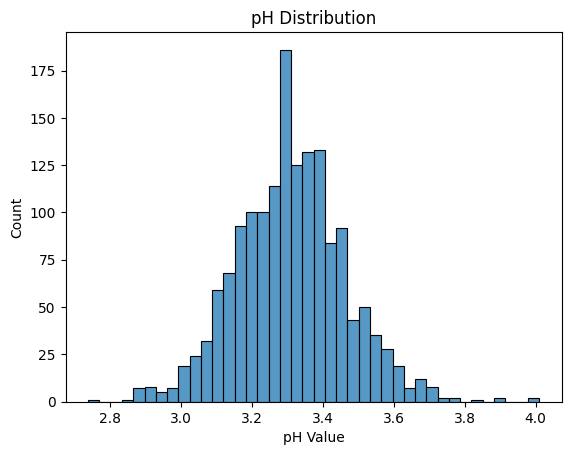

In [206]:

sns.histplot(df.pH)
plt.title("pH Distribution")
plt.xlabel("pH Value")
plt.ylabel("Count")
plt.show()

In [207]:
x= df.pH>mean_pH
x.value_counts()

False    824
True     777
Name: pH, dtype: int64

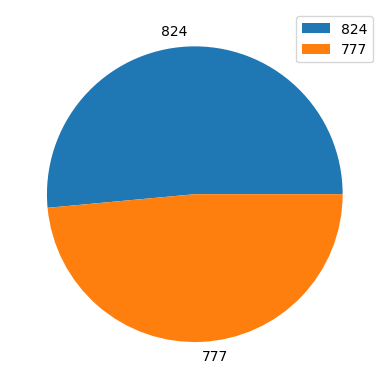

In [208]:
plt.pie(x.value_counts(), labels=x.value_counts())
plt.legend()

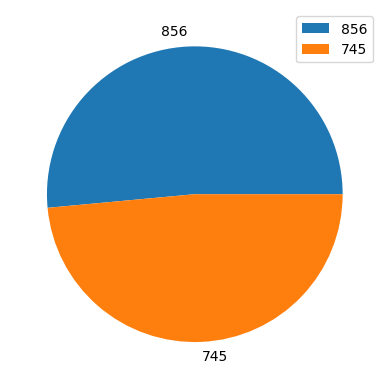

In [209]:

q= df.quality>mean_Q
q.value_counts()

plt.pie(x.value_counts(), labels=q.value_counts())
plt.legend()

In [210]:
mean_Q

5.63625

<Axes: xlabel='acidity-basic', ylabel='pH'>

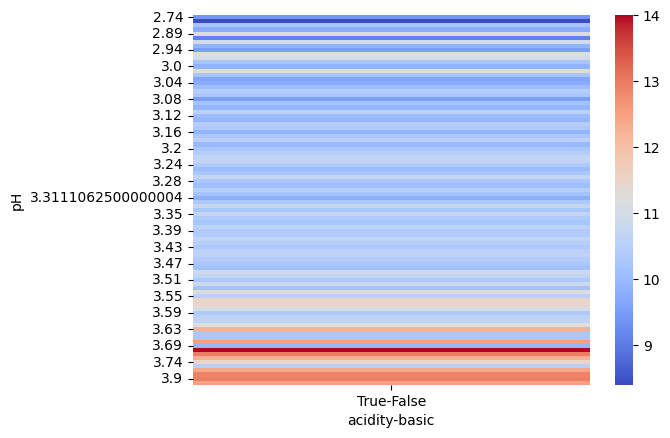

In [211]:

df['acidity'] = df['pH'] < 7
df['basic'] = df['pH'] > 7

#create pivot table
pivot_table = df.pivot_table(index='pH', columns=['acidity', 'basic'], values='alcohol')

# create heatmap
sns.heatmap(pivot_table, cmap='coolwarm')


<Axes: xlabel='acidity-basic', ylabel='pH'>

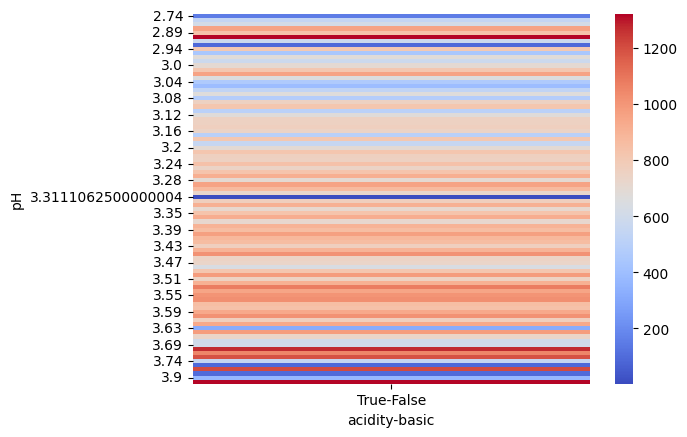

In [212]:

df['acidity'] = df['pH'] < 7
df['basic'] = df['pH'] > 7


pivot_table = df.pivot_table(index='pH', columns=['acidity', 'basic'], values='ID')

sns.heatmap(pivot_table, cmap='coolwarm')


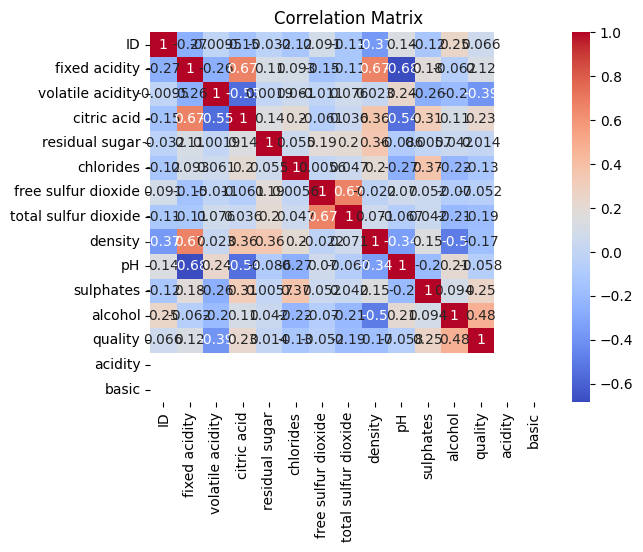

In [213]:
corr = df.corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

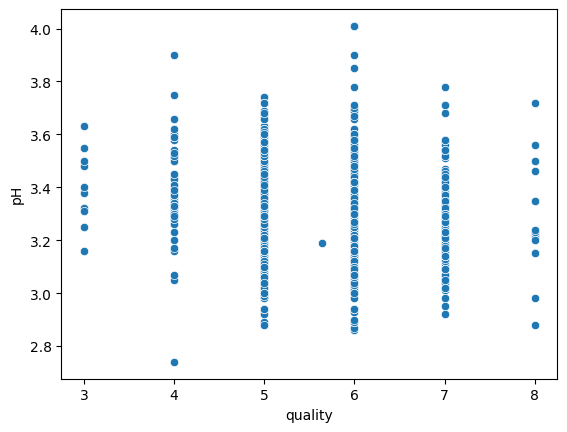

In [214]:
sns.scatterplot(x='quality', y='pH', data=df)
plt.show()


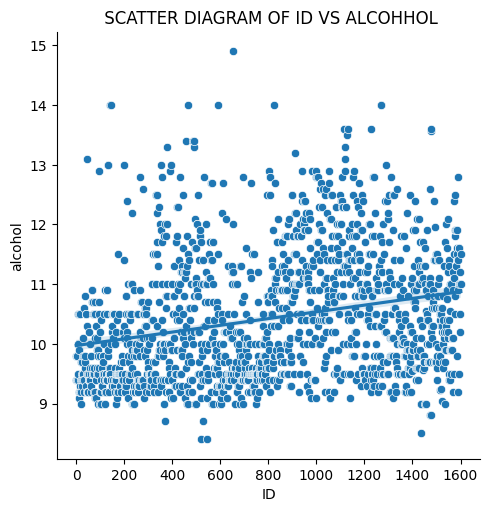

In [215]:
g = sns.relplot(data=df, x='ID', y='alcohol', kind='scatter')
sns.regplot(data=df, x='ID', y='alcohol', scatter=False, ax=g.ax)

# Set axis labels and plot title
plt.xlabel("ID")
plt.ylabel("alcohol")
plt.title(" SCATTER DIAGRAM OF ID VS ALCOHHOL")

# Show the plot
plt.show()

In [216]:
X = df[['quality']]
y = df['pH']
model = LinearRegression()
model.fit(X, y)
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
plt.show()

Intercept: 3.3737427843498327
Coefficient: [-0.01111316]


In [217]:
print("mean_Q:", np.mean(df['quality']))
print("Standard Deviation of pH:", np.std(df['pH']))
print("Correlation between quality and pH:", df['quality'].corr(df['pH']))

mean_Q: 5.6362499999999995
Standard Deviation of pH: 0.15424200008207614
Correlation between quality and pH: -0.05813464248687872


### Statistical inferences of individual columns in  the  dataset.

#### For Wine Quality

In [218]:
df['quality'].describe()



count    1601.000000
mean        5.636250
std         0.807116
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

#### For pH

In [219]:
df['pH'].describe()

count    1601.000000
mean        3.311106
std         0.154290
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

  #### For alcoholic content of the wine  manufactured

In [220]:
df['alcohol'].describe()

count    1601.000000
mean       10.423204
std         1.065495
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

#### for the fixed acidity of the  wine produced

In [221]:
df['fixed acidity'].describe()


count    1601.000000
mean        8.319875
std         1.739495
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

#### for the volatile acidity of the wines

In [222]:
df['volatile acidity'].describe()

count    1601.000000
mean        0.527742
std         0.178981
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

 #### For citric acid 

In [223]:
df['citric acid'].describe()


count    1601.000000
mean        0.271175
std         0.194684
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

#### For Residual sugar

In [224]:
df['residual sugar'].describe()


count    1601.000000
mean        2.538445
std         1.409138
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

 #### For Chlorides

In [225]:
df['chlorides'].describe()

count    1601.000000
mean        0.087487
std         0.047032
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

####  For Free Sulphur dioxide

In [226]:
df['free sulfur dioxide'].describe()

count    1601.000000
mean       15.886875
std        10.455218
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

#### For Total Sulphur dioxide

In [227]:
df['total sulfur dioxide'].describe()

count    1601.000000
mean       46.520000
std        32.967416
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

#### For Density

In [228]:
df['density'].describe()

count    1601.000000
mean        0.996746
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997830
max         1.003690
Name: density, dtype: float64

#### For Sulphates

In [229]:
df['sulphates'].describe()

count    1601.000000
mean        0.658220
std         0.169471
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

##### the graph below show alcoholic content of the various wines  manufactured


### CONSIDERING THE ALCOHOLIC CONTENT OF THE WINES MANUFACTUREED

<Axes: xlabel='alcohol', ylabel='Count'>

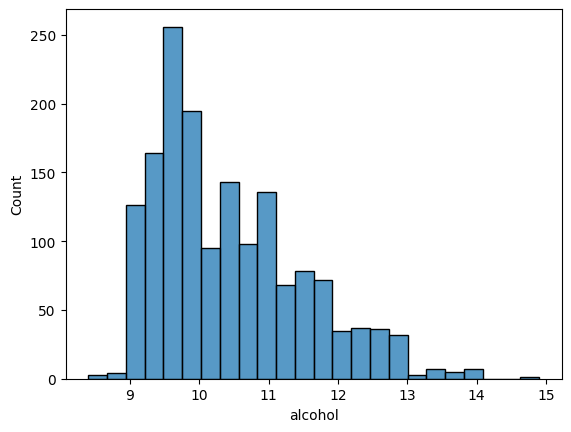

In [230]:
sns.histplot(df.alcohol)

In [231]:
mean_a=df["alcohol"].mean()
mean_a
print("The mean alcohol content of the wines is {:.6f}.".format(mean_a))

The mean alcohol content of the wines is 10.423204.


In [232]:

a= df.alcohol>mean_a
a.value_counts()



False    917
True     684
Name: alcohol, dtype: int64

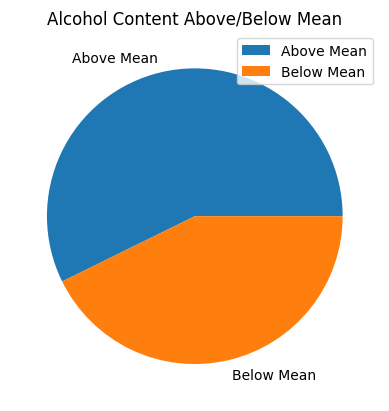

In [233]:
mean_a = df['alcohol'].mean()
a = df['alcohol'] > mean_a
counts = a.value_counts()

plt.pie(counts, labels=['Above Mean', 'Below Mean'])

plt.title('Alcohol Content Above/Below Mean')
plt.legend()
plt.show()